<a href="https://colab.research.google.com/github/J-oyin/Dr.-Jimoh-Analysis/blob/main/GPx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
df = pd.read_excel("/content/Dr.J_GPX.xlsx")

df.head()


,S/N,Group,GPX_level,Subject
0,1,Healthy,43.888000,RC1
1,2,Healthy,21.381333,RC2
2,3,Healthy,7.877333,RC3
3,4,Healthy,21.381333,RC4
4,5,Healthy,16.880000,RC5


In [3]:
custom_order = [
    "Healthy", "Resilient", "S/DW", "S/Esc",
    "S/LASA", "S/HASA",

]

df["Group"] = pd.Categorical(df["Group"], categories=custom_order, ordered=True)


In [4]:
print(df['Group'].unique())
print(df['Group'].value_counts())


['Healthy', 'Resilient', 'S/DW', 'S/Esc', 'S/LASA', 'S/HASA']
Categories (6, object): ['Healthy' < 'Resilient' < 'S/DW' < 'S/Esc' < 'S/LASA' < 'S/HASA']
Group
Healthy      5
Resilient    5
S/DW         5
S/Esc        5
S/LASA       5
S/HASA       5
Name: count, dtype: int64


In [5]:
for grp, sub in df.groupby('Group'):
    stat, p = shapiro(sub['GPX_level'])
    print(f"{grp}: Shapiro p = {p:.4f}")


Healthy: Shapiro p = 0.3463
Resilient: Shapiro p = 0.3813
S/DW: Shapiro p = 0.6809
S/Esc: Shapiro p = 0.5051
S/LASA: Shapiro p = 0.0212
S/HASA: Shapiro p = 0.7093


/tmp/ipython-input-2798187236.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for grp, sub in df.groupby('Group'):


In [6]:
groups = [sub['GPX_level'].values for _, sub in df.groupby('Group')]
stat, p = levene(*groups)
print(f"Levene test p = {p:.4f}")


Levene test p = 0.9632


/tmp/ipython-input-850459788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [sub['GPX_level'].values for _, sub in df.groupby('Group')]


In [7]:
from scipy.stats import kruskal

groups = [sub['GPX_level'].values for _, sub in df.groupby('Group')]


/tmp/ipython-input-4028133491.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [sub['GPX_level'].values for _, sub in df.groupby('Group')]


In [8]:
H, p = kruskal(*groups)
print(f"Kruskal–Wallis H = {H:.3f}, p = {p:.4e}")


Kruskal–Wallis H = 13.950, p = 1.5930e-02


In [9]:
pip install scikit-posthocs


In [10]:
import scikit_posthocs as sp

dunn = sp.posthoc_dunn(
    df,
    val_col='GPX_level',
    group_col='Group',
    p_adjust='fdr_bh'
)

print(dunn)


            Healthy  Resilient      S/DW     S/Esc    S/LASA    S/HASA
Healthy    1.000000   0.035584  0.519217  0.120956  0.985650  0.121233
Resilient  0.035584   1.000000  0.120956  0.519217  0.035584  0.519217
S/DW       0.519217   0.120956  1.000000  0.366205  0.519217  0.428583
S/Esc      0.120956   0.519217  0.366205  1.000000  0.120956  0.933644
S/LASA     0.985650   0.035584  0.519217  0.120956  1.000000  0.121233
S/HASA     0.121233   0.519217  0.428583  0.933644  0.121233  1.000000


/tmp/ipython-input-2798694331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Group', y='GPX_level', palette='Set2')


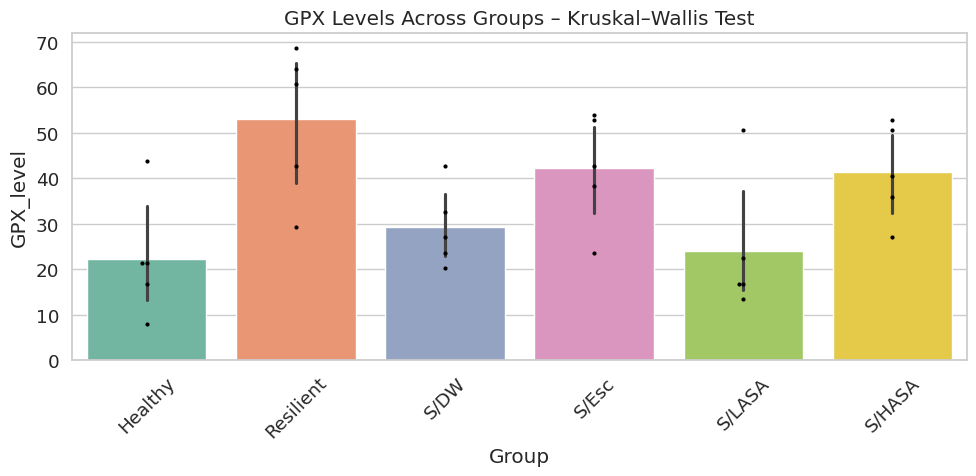

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Group', y='GPX_level', palette='Set2')
sns.swarmplot(data=df, x='Group', y='GPX_level', color='black', size=3)

plt.title("GPX Levels Across Groups – Kruskal–Wallis Test")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_plot = (
    df.groupby('Group')['GPX_level']
      .agg(mean='mean',
           sem=lambda x: x.std(ddof=1)/np.sqrt(len(x)))
      .reset_index()
)


/tmp/ipython-input-1581097154.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Group')['GPX_level']


In [13]:
# Convert Dunn matrix to long format
sig_pairs = []
for g1 in dunn.index:
    for g2 in dunn.columns:
        if g1 != g2:
            p = dunn.loc[g1, g2]
            if p < 0.05:    # Significant
                sig_pairs.append((g1, g2, p))

print("\nSignificant comparisons:", sig_pairs)



Significant comparisons: [('Healthy', 'Resilient', np.float64(0.03558353339589904)), ('Resilient', 'Healthy', np.float64(0.03558353339589904)), ('Resilient', 'S/LASA', np.float64(0.03558353339589904)), ('S/LASA', 'Resilient', np.float64(0.03558353339589904))]


In [14]:
def p_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'


/tmp/ipython-input-720907709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


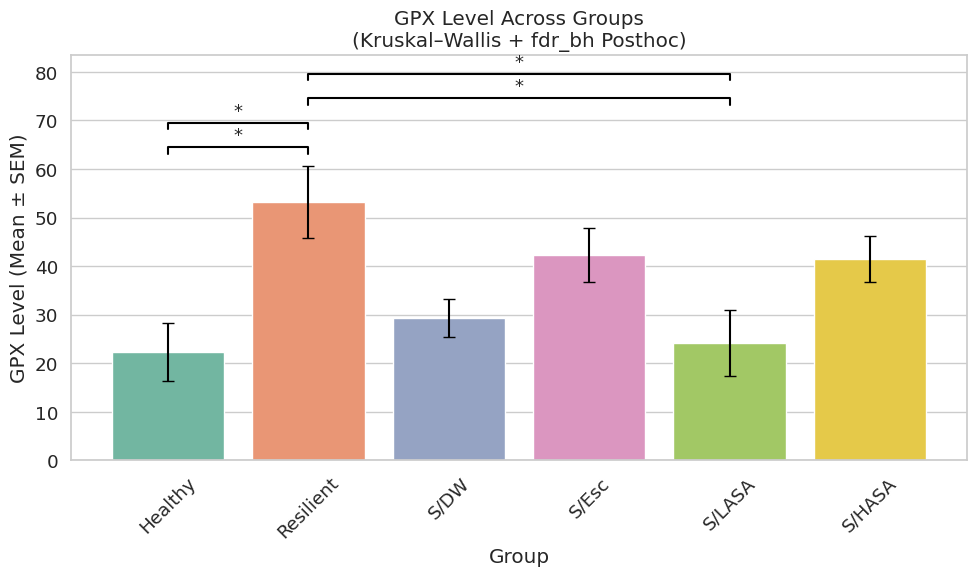

In [15]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.barplot(
    data=summary_plot,
    x='Group',
    y='mean',
    errorbar=None,
    palette='Set2'
)

# Add SEM error bars
for i, row in summary_plot.iterrows():
    ax.errorbar(i, row['mean'], yerr=row['sem'], fmt='none',
                ecolor='black', capsize=4)

# Add stars for Dunn-significant pairs
y_max = summary_plot['mean'].max() + summary_plot['sem'].max() + 0.05*summary_plot['mean'].max()
height_step = 0.08 * y_max
current_height = y_max

for (g1, g2, p) in sig_pairs:
    x1 = summary_plot.index[summary_plot['Group'] == g1][0]
    x2 = summary_plot.index[summary_plot['Group'] == g2][0]

    stars = p_to_stars(p)

    # Draw connecting bracket
    ax.plot([x1, x1, x2, x2],
            [current_height, current_height + 0.02*y_max,
             current_height + 0.02*y_max, current_height],
            c='black')

    # Add stars
    ax.text((x1+x2)/2,
            current_height + 0.03*y_max,
            stars,
            ha='center', va='bottom',
            fontsize=13)

    current_height += height_step  # Stack next annotation above

plt.ylabel("GPX Level (Mean ± SEM)")
plt.title("GPX Level Across Groups\n(Kruskal–Wallis + fdr_bh Posthoc)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp

# ───────────────────────────────
# 1. SUMMARY STATISTICS
# ───────────────────────────────
summary = (
    df.groupby('Group')['GPX_level']
      .agg(
          N='count',
          Median='median',
          Q1=lambda x: np.percentile(x, 25),
          Q3=lambda x: np.percentile(x, 75),
          Mean='mean',
          SD='std'
      )
      .reset_index()
)

summary['IQR'] = summary['Q3'] - summary['Q1']

print("\n=== SUMMARY TABLE (PER GROUP) ===")
print(summary)


# ───────────────────────────────
# 2. KRUSKAL–WALLIS
# ───────────────────────────────
group_arrays = [vals['GPX_level'].values for _, vals in df.groupby('Group')]

H, p_kw = kruskal(*group_arrays)

kw_table = pd.DataFrame({
    'H_statistic': [H],
    'p_value': [p_kw]
})

print("\n=== KRUSKAL–WALLIS RESULT ===")
print(kw_table)


# ───────────────────────────────
# 3. DUNN POSTHOC TEST (Holm corrected)
# ───────────────────────────────
dunn = sp.posthoc_dunn(df, val_col='GPX_level', group_col='Group', p_adjust='holm')

print("\n=== DUNN POSTHOC (fdr_bh-corrected) ===")
print(dunn)


# ───────────────────────────────
# 4. MANUSCRIPT-READY TABLE COMBINED
# ───────────────────────────────
manuscript_table = {
    "Summary": summary,
    "Kruskal_Wallis": kw_table,
    "Dunn_Posthoc": dunn
}

print("\n\n==== MANUSCRIPT READY TABLES GENERATED ====")



=== SUMMARY TABLE (PER GROUP) ===
       Group  N     Median         Q1         Q3       Mean         SD  \
0    Healthy  5  21.381333  16.880000  21.381333  22.281600  13.277026   
1  Resilient  5  60.768000  42.762667  64.144000  53.115733  16.565732   
2       S/DW  5  27.008000  23.632000  32.634667  29.258667   8.825082   
3      S/Esc  5  42.762667  38.261333  52.890667  42.312533  12.394003   
4     S/LASA  5  16.880000  16.880000  22.506667  24.082133  15.194084   
5     S/HASA  5  40.512000  36.010667  50.640000  41.412267  10.658041   

         IQR  
0   4.501333  
1  21.381333  
2   9.002667  
3  14.629333  
4   5.626667  
5  14.629333  

=== KRUSKAL–WALLIS RESULT ===
   H_statistic  p_value
0    13.950022  0.01593

=== DUNN POSTHOC (fdr_bh-corrected) ===
            Healthy  Resilient      S/DW     S/Esc    S/LASA    S/HASA
Healthy    1.000000   0.067273  1.000000  0.480203  1.000000  0.542842
Resilient  0.067273   1.000000  0.480203  1.000000  0.067273  1.000000
S/DW    

/tmp/ipython-input-133323612.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Group')['GPX_level']
/tmp/ipython-input-133323612.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_arrays = [vals['GPX_level'].values for _, vals in df.groupby('Group')]


In [17]:
with pd.ExcelWriter("GPX_KW_Analysis.xlsx") as writer:
    summary.to_excel(writer, sheet_name="Summary", index=False)
    kw_table.to_excel(writer, sheet_name="Kruskal", index=False)
    dunn.to_excel(writer, sheet_name="Dunn_Posthoc")


In [18]:
groups_to_compare = ["Healthy", "Resilient"]

# Generate contrasts manually
pairs_of_interest = [
    ("Healthy", g) for g in summary_plot["Group"] if g != "Healthy"
] + [
    ("Resilient", g) for g in summary_plot["Group"] if g != "Resilient"
]


In [19]:
import scikit_posthocs as sp

# Produce posthoc matrix (p-values for all)
p_matrix = sp.posthoc_dunn(df, val_col='GPX_level', group_col='Group', p_adjust='fdr_bh')

# Keep only the contrasts of interest
filtered_pvals = [
    (g1, g2, p_matrix.loc[g1, g2])
    for (g1, g2) in pairs_of_interest
]

/tmp/ipython-input-2244724200.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=summary_plot, x='Group', y='mean', palette='viridis', errorbar=None)


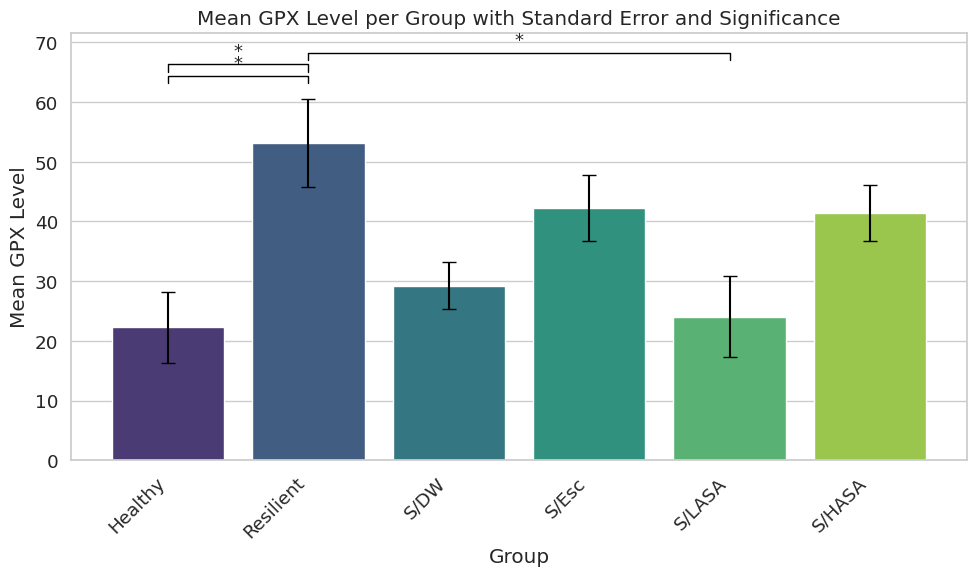

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def p_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.barplot(data=summary_plot, x='Group', y='mean', palette='viridis', errorbar=None)

# Add SEM error bars
for i, row in summary_plot.iterrows():
    ax.errorbar(i, row['mean'], yerr=row['sem'], fmt='none', ecolor='black', capsize=5)

# Add stars for Dunn-significant pairs
y_max = summary_plot['mean'].max() + summary_plot['sem'].max() + 0.05 * summary_plot['mean'].max()
height_step = 0.03 * y_max
current_height = y_max
bump = 0.02 * y_max

# Get unique group names to ensure correct indexing
group_names = summary_plot['Group'].tolist()

for (g1, g2, p) in filtered_pvals:
    if p < 0.05: # Only plot significant pairs
        try:
            x1 = group_names.index(g1)
            x2 = group_names.index(g2)

            stars = p_to_stars(p)

            # Draw connecting bracket
            ax.plot([x1, x1, x2, x2],
                    [current_height, current_height + bump,
                     current_height + bump, current_height],
                    c='black', lw=1)

            # Add stars
            ax.text((x1 + x2) / 2,
                    current_height + 0.03 * y_max,
                    stars,
                    ha='center', va='bottom',
                    fontsize=13)

            current_height += height_step  # Stack next annotation above
        except ValueError: # Handle cases where a group might not be in the plot
            continue

plt.title('Mean GPX Level per Group with Standard Error and Significance')
plt.xlabel('Group')
plt.ylabel('Mean GPX Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()